# Dependacies

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
import os
import random

# Importing Training Data

In [2]:
ClassNames = ['Aircraft Carrier', 'Bulkers', 'Car Carrier', 'Container Ship', 'Cruise', 'DDG', 'Recreational', 'Sailboat', 'Submarine', 'Tug']

In [14]:
import os
import cv2
import numpy as np
base_path = r'C:\dev\workspace\Asia_Arrived_La\Data\Ships_dataset\train'
data_image = os.path.join(base_path, 'images')
data_label = os.path.join(base_path, 'labels')
traindata = []
pathi = os.path.join(data_image)
pathl = os.path.join(data_label)

for file in os.listdir(pathi):
    file_p  = os.path.join(pathi, file)
    image = cv2.imread(file_p)
    image = np.array(image)
    image=cv2.resize(image, (64,64),interpolation=cv2.INTER_LINEAR)
    traindata.append(image)

In [15]:
import os
trainlabel = []
for file in os.listdir(pathl):
    file_p  = os.path.join(pathl, file)
    f = open(file_p, "r")
    a = int(f.read(1))
    trainlabel.append(a)

In [18]:
import random
data = []
for i in range(0,len(trainlabel)):
    traindata[i] = traindata[i]/255
    data.append((traindata[i], trainlabel[i]))

random.shuffle(data)
images, labels =  [], []
for a, b in data:
    images.append(a)
    labels.append(b)

# visualize the Data

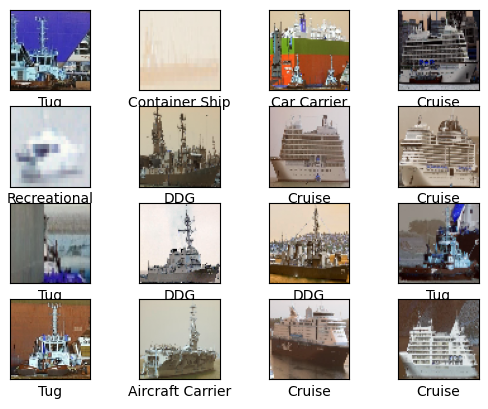

In [24]:
import matplotlib.pyplot as plt
ClassNames = ['Aircraft Carrier', 'Bulkers', 'Car Carrier', 'Container Ship', 'Cruise', 'DDG', 'Recreational', 'Sailboat', 'Submarine', 'Tug']
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i],cmap=plt.cm.binary)
    plt.xlabel(ClassNames[labels[i]])
plt.show()

# Importing Validation Data, Model, Training the Model

In [31]:
import os
import numpy as np
import cv2
import matplotlib as plt

base_path = r'C:\dev\workspace\Asia_Arrived_La\Data\Ships_dataset\train'
validdata = []
validdata = []
pathi = os.path.join(base_path, 'images')
pathl = os.path.join(base_path, 'labels')

for file in os.listdir(pathi):
    file_p  = os.path.join(pathi, file)
    image = cv2.imread(file_p)
    image = np.array(image)
    image=cv2.resize(image, (64,64),interpolation=cv2.INTER_LINEAR)
    validdata.append(image)
    
validlabel = []
for file in os.listdir(pathl):
    file_p  = os.path.join(pathl, file)
    f = open(file_p, "r")
    a = int(f.read(1))
    validlabel.append(a)
    
validation = []
for i in range(0,len(validlabel)):
    validdata[i] = validdata[i]/255
    validation.append((validdata[i], validlabel[i]))

random.shuffle(validation)
validationimages, validationlabels =  [], []
for a, b in validation:
    validationimages.append(a)
    validationlabels.append(b)

images = np.array(images)
labels = np.array(labels)
validationimages = np.array(validationimages)
validationlabels = np.array(validationlabels)
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(images,labels,batch_size = 32,epochs=2,validation_data=(validationimages,validationlabels))

loss, accuracy = model.evaluate(images,labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

Epoch 1/2
232/232 ━━━━━━━━━━━━━━━━━━━━ 85s 338ms/step - accuracy: 0.4506 - loss: 1.6121 - val_accuracy: 0.8184 - val_loss: 0.5890
Epoch 2/2
232/232 ━━━━━━━━━━━━━━━━━━━━ 75s 324ms/step - accuracy: 0.8437 - loss: 0.5089 - val_accuracy: 0.8716 - val_loss: 0.3902
232/232 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.8711 - loss: 0.3954
Loss: 0.3902071416378021
Accuracy: 0.8715906143188477


# Exporing the model, Loading the model, Importing testing Data, Testing the model

In [47]:
! pip install h5py

In [46]:
import numpy as np
import pandas as pd
import cv2
import h5py
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
import os
import random
base_path = r'C:\dev\workspace\Asia_Arrived_La\Data\Ships_dataset\train'
pathi = os.path.join(base_path, 'images')
pathl = os.path.join(base_path, 'labels')
testdata = []
model.save('ShipClassifierV1.h5')
model = models.load_model('ShipClassifierV1.h5')
for file in os.listdir(pathi):
    file_p  = os.path.join(pathi, file)
    image = cv2.imread(file_p)
    image = np.array(image)
    image=cv2.resize(image, (64,64),interpolation=cv2.INTER_LINEAR)
    testdata.append(image)
    
testlabel = []
for file in os.listdir(pathl):
    file_p  = os.path.join(pathl, file)
    f = open(file_p, "r")
    a = int(f.read(1))
    testlabel.append(a)
    
testing = []
for i in range(0,len(testlabel)):
    testdata[i] = testdata[i]/255
    testing.append((testdata[i], testlabel[i]))

random.shuffle(testing)
testingimages, testinglabels =  [], []
for a, b in testing:
    testingimages.append(a)
    testinglabels.append(b)
    
testinglabels = np.array(testinglabels)
testingimages = np.array(testingimages)
loss, accuracy = model.evaluate(testingimages,testinglabels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(testingimages[i],cmap=plt.cm.binary)
    pred = model.predict(np.array([testingimages[i]]))
    index = np.argmax(pred)
    plt.xlabel(f"Actual = {ClassNames[testinglabels[i]]} \n Predicted = {ClassNames[index]}")
    
plt.show()

ImportError: DLL load failed while importing _errors: 지정된 프로시저를 찾을 수 없습니다.

# FGSM

In [56]:
from tensorflow.keras.losses import MSE
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import cv2
import os

ClassNames = ['Aircraft Carrier', 'Bulkers', 'Car Carrier', 'Container Ship', 'Cruise', 'DDG', 'Recreational', 'Sailboat', 'Submarine', 'Tug']

base_path = r'C:\dev\workspace\Asia_Arrived_La\Data\Ships_dataset\train'
data_image = os.path.join(base_path, 'images')
data_label = os.path.join(base_path, 'labels')

testdata = [] 
testlabel = []

for file in os.listdir(data_image):
    file_p = os.path.join(data_image, file)
    image = cv2.imread(file_p)
    if image is not None:
        image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_LINEAR)
        testdata.append(image / 255.0)  # Normalize images

for file in os.listdir(data_label):
    file_p = os.path.join(data_label, file)
    with open(file_p, "r") as f:
        a = int(f.read(1))
        testlabel.append(a)

# 데이터와 레이블을 튜플로 결합
testdata = list(zip(traindata, testlabel))

def generate_image_adversary(model, image, label, eps=2 / 255.0):
    image = tf.cast(image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(image)
        pred = model(image)
        loss = MSE(label, pred)
    gradient = tape.gradient(loss, image)
    signedGrad = tf.sign(gradient)
    adversary = (image + (signedGrad * eps)).numpy()
    return adversary

model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델 정의 (가정: 모델을 미리 정의하고 학습시켰다고 가정)
# model = ShipClassifierV1.h5

for i in np.random.choice(np.arange(len(testdata)), size=10):
    image = testdata[i]
    label = testlabel[i]  # 라벨을 원-핫 인코딩
    adversary = generate_image_adversary(model, image.reshape(1, 64, 64, 3), label.reshape(1, len(ClassNames)), eps=0.1)
    pred = model.predict(adversary)
    
    adversary = adversary.reshape((64, 64, 3)) * 255
    adversary = np.clip(adversary, 0, 255).astype("uint8")
    image = image.reshape((64, 64, 3)) * 255
    image = image.astype("uint8")
    
    image = np.dstack([image] * 3)
    adversary = np.dstack([adversary] * 3)
    image = cv2.resize(image, (96, 96))
    adversary = cv2.resize(adversary, (96, 96))
    
    imagePred = np.argmax(model.predict(image.reshape(1, 64, 64, 3)))
    adversaryPred = np.argmax(pred[0])
    color = (0, 255, 0)
    
    if imagePred != adversaryPred:
        color = (0, 0, 255)
    
    cv2.putText(image, str(imagePred), (2, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.95, (0, 255, 0), 2)
    cv2.putText(adversary, str(adversaryPred), (2, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.95, color, 2)
    
    output = np.hstack([image, adversary])
    cv2.imshow("FGSM Adversarial Images", output)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


AttributeError: 'tuple' object has no attribute 'reshape'